# Assignment 1 (not for submission): logarithm and exponent

In [7]:
import math
import matplotlib.pyplot as plt
import numpy

## Question 1: Counting permutations

We are given a set of $N$ elements (e.g. books in the reading lists). We need to estimate the number of $k$-permutations, or possible orders of subsets of $K$ elements of the set, $1 \le K \le N$.

Mathematically, the answer is by the following formula,

$$P(N, K) = \frac {N!} {(N-K)!}$$

1. Write a function to compute the exact number of permutations. Compute the number of k-permutations and the running time for N=1 K=1, N=4 K=2, N=10000 K=10. 
2. Write an approximate function using $\log$ transformation. Compare the running times.
3. What is the absolute and relative error of computing the number of permutations for each combination of arguments?

In [2]:
def fact(n):
  fct = 1
  for i in range(n):
    fct *= i+1
  return fct
def binom(n, k):
  return fact(n)//fact(n - k)

In [3]:
%time print("1 out of 1 = %d" % binom(1, 1))
%time print("3 out of 4  = %d" % binom(4, 2))
%time print("10 out of 100000 = %d" % binom(10000, 10))

1 out of 1 = 1
CPU times: user 1.04 ms, sys: 5 µs, total: 1.05 ms
Wall time: 1.07 ms
3 out of 4  = 12
CPU times: user 482 µs, sys: 0 ns, total: 482 µs
Wall time: 488 µs
10 out of 100000 = 9955086905563246074735627402653971200000
CPU times: user 44.7 ms, sys: 0 ns, total: 44.7 ms
Wall time: 44.8 ms


In [4]:
def logfact(n):
  logf = 0
  for i in range(n):
    logf += math.log(i + 1)
  return logf

def logbinom(n, k):
  return round(math.exp(logfact(n) - logfact(n - k)))


In [8]:
%time print("1 out of 1 = %d" % logbinom(1, 1))
%time print("3 out of 4  = %d" % logbinom(4, 2))
%time print("10 out of 100000 = %d" % logbinom(10000, 10))

1 out of 1 = 1
CPU times: user 1.31 ms, sys: 37 µs, total: 1.34 ms
Wall time: 1.33 ms
3 out of 4  = 12
CPU times: user 489 µs, sys: 3 µs, total: 492 µs
Wall time: 498 µs
10 out of 100000 = 9955086905474819609919064913738870030336
CPU times: user 5.71 ms, sys: 0 ns, total: 5.71 ms
Wall time: 5.9 ms


In [9]:
a = binom(10000, 10)
b = logbinom(10000, 10)
err = abs(a - b )
print(f"a={a} b={b} error = {err:6g}")

a=9955086905563246074735627402653971200000 b=9955086905474819609919064913738870030336 error = 8.84265e+28


In [10]:
relerr = err/a*100
print(f"relative error = {relerr:.8f}%")

relative error = 0.00000000%


## Question 2: processing data with magnitudal differences

A seismic sensor measures amplitude of earthquakes in  an area of the Pacific ocean. We are given average  yearly intensities of earthquakes over 30 years. Visualize the data on natural and logarithmic scale. Does the intensity change over time?

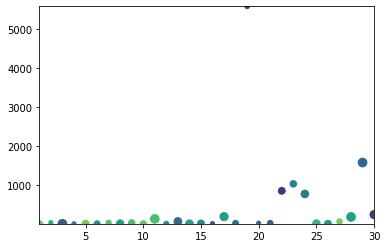

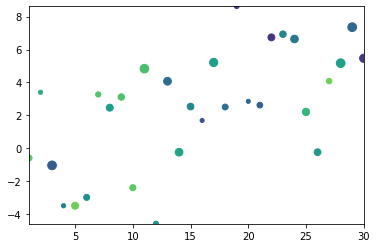

In [1]:
import matplotlib.pyplot as plt
import numpy as np

earthquakes = [0.55,
 29.85,
 0.35,
 0.03,
 0.03,
 0.05,
 26.2,
 11.71,
 22.40,
 0.09,
 125.72,
 0.01,
 58.51,
 0.78,
 12.54,
 5.38,
 183.21,
 12.20,
 5572.37,
 17.23,
 13.68,
 845.38,
 1024.14,
 765.27,
 9.06,
 0.78,
 59.06,
 175.66,
 1570.27,
 236.5]

years = []
for i in range(30):
  years.append(i+1)

# make the data
x = years
y = earthquakes
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(min(x), max(x)),
       ylim=(min(y), max(y)))

plt.show()

# plot
fig, ax = plt.subplots()

ax.scatter(x, np.log(y), s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(min(x), max(x)),
       ylim=(min(np.log(y)), max(np.log(y))))

plt.show()

